In [2]:
from os import scandir
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import numpy as np

In [3]:
def load_html(path):
    with open(path,encoding= 'UTF-8') as fp:
        soup = BeautifulSoup(fp)
    return soup

# Input file path

In [4]:
#folder with the chat logs
folder = r'C:\Users\rich\Downloads\facebook-richardzhang589\messages\inbox\baddiscourse_fuc3Dx0eOw'

In [5]:
#empty lists for person, timestamp, and message
a, b, c = ([] for i in range(3))

#read all html files in the folder
for file in scandir(folder):
    if file.is_file(): #and file.name=='message_1.html':
        print(file.name)
        soup = load_html(file.path)
        count = 0
        #person
        for tag in soup.find_all("div", class_="_3-96 _2pio _2lek _2lel"):
            a.append(tag.get_text())
        #timestamp; first div is blank, skip; it's either this or modifying the iterator
        for tag in soup.find_all("div", class_="_3-94 _2lem"):
            if count == 0:
                count+=1
            else:
                b.append(datetime.datetime.strptime(tag.get_text(),'%b %d, %Y, %I:%M %p'))
        #message
        for tag in soup.find_all("div", class_="_3-96 _2let"):
            c.append(tag.get_text())

message_1.html
message_10.html
message_11.html
message_12.html
message_13.html
message_14.html
message_15.html
message_16.html
message_17.html
message_18.html
message_19.html
message_2.html
message_20.html
message_21.html
message_22.html
message_23.html
message_24.html
message_25.html
message_3.html
message_4.html
message_5.html
message_6.html
message_7.html
message_8.html
message_9.html


In [6]:
#3 columns, range index
data = {'Name':a,'Timestamp':b,'Message':c}
table = pd.DataFrame(data).sort_values(by='Timestamp')
#2 columns, timestamp index
data = {'Name':a,'Message':c}
table2 = pd.DataFrame(data, index=b).sort_index()

# Data ingestion complete
There are two users with the same user name, which can't be distinguished from the html logs as far as I know. Such are the limitations of scraping html files.

The "per person" cells aren't run as code so as not to display names. In the future, I might replace the names with IDs in the future and display them. 

In [7]:
#size of data
table.count()

Name         242927
Timestamp    242927
Message      242927
dtype: int64

In [9]:
#messages_over_time = pd.DataFrame(table2.groupby(by=[table2.index.year,'Name']).count())
messages_over_time = pd.DataFrame(table.groupby(by=[table2.index.year,table2.index.month]).count().loc[:,'Message'])
#messages_over_time = table.groupby(pd.Grouper(key=table.index,freq='1M'))

         Message
2015 1       314
     2       522
     3      1063
     4       540
     5       398
     6       723
     7      2454
     8      2097
     9       568
     10      589
     11      678
     12      263
2016 1      1609
     2      1074
     3       789
     4       956
     5       302
     6      1123
     7      1392
     8      1316
     9      1891
     10     3503
     11     5175
     12     4001
2017 1      5534
     2      3317
     3      3083
     4      3888
     5      3803
     6      4811
...          ...
2018 1      3772
     2      3787
     3      6407
     4      7948
     5      6238
     6      8717
     7     11561
     8      8393
     9      5018
     10     6584
     11     6020
     12     6793
2019 1      4254
     2      3415
     3      5671
     4      5739
     5      4967
     6      5076
     7      4852
     8      3601
     9      2581
     10     4529
     11     4357
     12     3566
2020 1      3635
     2      2917
     3      38

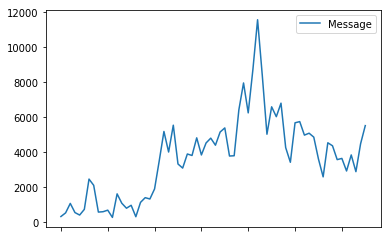

In [11]:
#Messages by month and year
print(messages_over_time)
messages_over_time.plot()

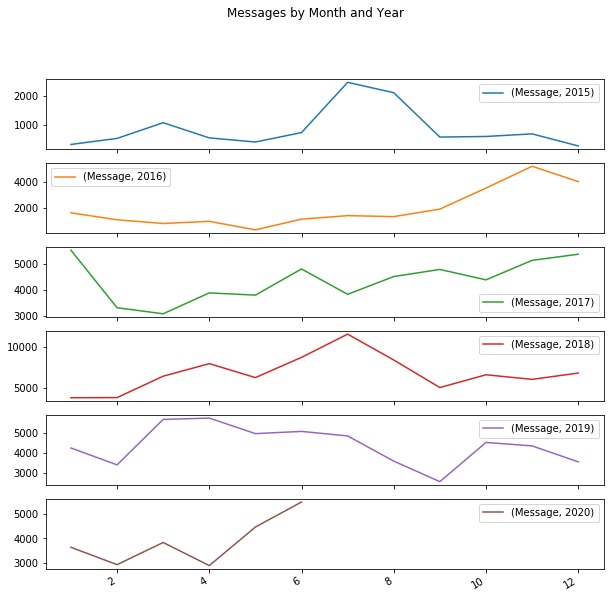

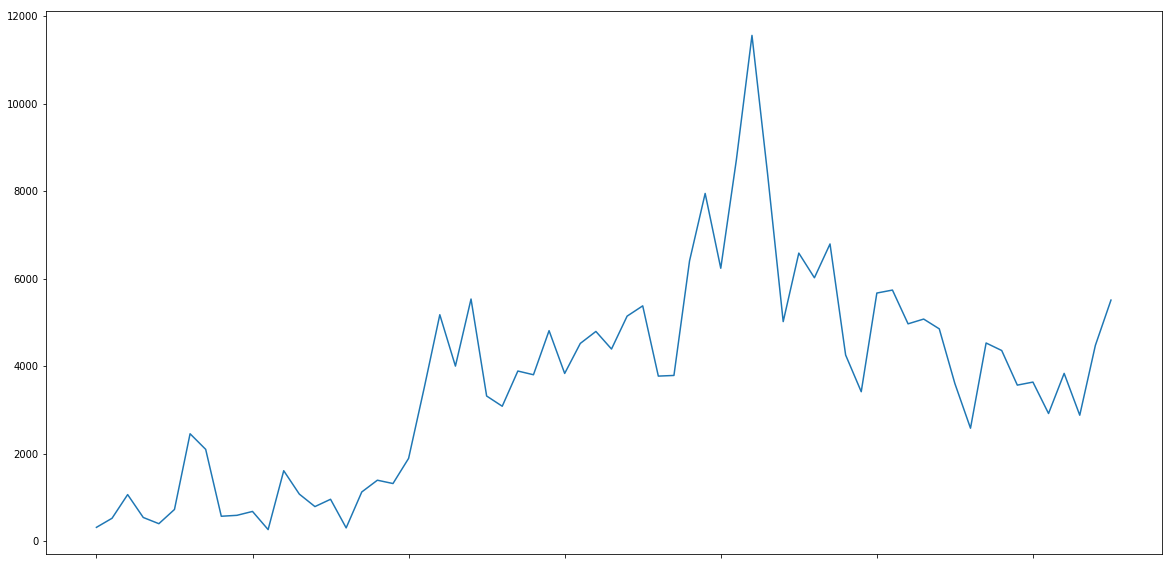

In [11]:
messages_over_time.unstack(level=0).plot(subplots=True,legend=True,figsize=[10,10],title='Messages by Month and Year')
#TODO: Add x axis labels, multi-level indexes are causing issues 
messages_over_time.plot(figsize=[20,10],legend=False)